In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 25
lim_a = 0
lim_b = 1
sigma = 1.0
p = 0.25
S = 10

In [3]:
X = np.random.uniform(lim_a, lim_b, (N, 1))
Y = X + np.random.normal(0, sigma, (N, 1))

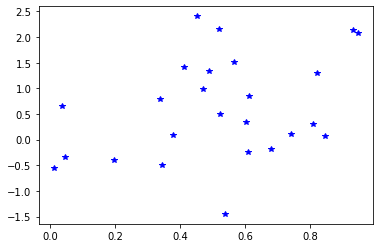

In [4]:
f = plt.figure(1)
plt.plot(X, Y, 'b*')
plt.show()
f.savefig('points.pdf')

Look for the predictor $f ( x_n ) = a x_n \approx y_n, \: \forall n$

In [5]:
a = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
print('a =', a)

a = [[1.22569024]]


In [6]:
x_range = np.linspace(X.min(), X.max(), 3 * N).reshape(-1, 1)
y_range = a * x_range

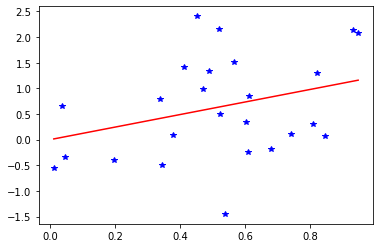

In [7]:
f = plt.figure(1)
plt.plot(X, Y, 'b*')
plt.plot(x_range, y_range, 'r-')
plt.show()
f.savefig('regressor.pdf')

We add small perturbations to the predictor by removing patterns randomly

In [8]:
y_range_list = [y_range]
a_list = [a]
for s in range(1, S + 1):
    mask = np.random.choice((False, True), N, p=(p, 1.0 - p))
    X_s = X[mask]
    Y_s = Y[mask]
    a_s = np.dot(np.linalg.inv(np.dot(X_s.T, X_s)), np.dot(X_s.T, Y_s))
    y_range_s = a_s * x_range
    # Save
    y_range_list.append(y_range_s)
    a_list.append(a_s)

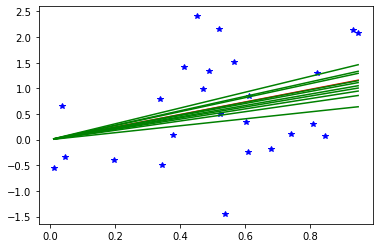

In [9]:
f = plt.figure(1)
plt.plot(X, Y, 'b*')
plt.plot(x_range, y_range, 'r-')
for s in range(1, S + 1):
    plt.plot(x_range, y_range_list[s], 'g-')
plt.show()
f.savefig('regressor_s.pdf')

For a random point $x_n$, we can break down the Mean Squared Error in bias and variance:

In [13]:
n = np.random.choice(np.arange(N))
x_n, y_n = X[n], Y[n]
print('Random point (', x_n, ',', y_n)
f_s = np.dot(np.array(a_list), x_n)
print('Vector of predictions =', f_s)
variance = np.mean((f_s - np.mean(f_s))**2)
print('Variance =', variance)
bias_2 = ((np.mean(f_s) - y_n)**2)[0]
print('Bias^2 =', bias_2)

Random point ( [0.52252893] , [0.4940711]
Vector of predictions = [[0.64045861]
 [0.52320144]
 [0.58091837]
 [0.80691762]
 [0.71412579]
 [0.635603  ]
 [0.61449159]
 [0.3542621 ]
 [0.55569072]
 [0.73633328]
 [0.47549026]]
Variance = 0.014684388833702907
Bias^2 = 0.011954652867458667


The bias and variance errors are of the same magnitude, which means that the error made by the model predicting the pattern $x_n$ is similar to the difference between the models that can be obtained.